<a href="https://colab.research.google.com/github/rozario-lamperouge/DeepLearningCourse/blob/main/CNN_Fashion_Clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer.

In [ ]:
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('acc')>0.90:
      print('/n Reached 99% Accuracy, so stopping training!')
      self.model.stop_training = True

callbacks = Callback()

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train , X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(128,activation=tf.nn.softmax)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=10,callbacks=[callbacks])

test_loss = model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5367 - acc: 0.8157
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - acc: 0.8618
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3484 - acc: 0.8745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3251 - acc: 0.8811
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3018 - acc: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2893 - acc: 0.8931
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - acc: 0.8993
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3372 - acc: 0.8772


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  100480    
_________________________________________________________________
dense_9 (Dense)              multiple                  16512     
Total params: 116,992
Trainable params: 116,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train / 255.0
X_test = X_test / 255.0

model = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

model.fit(X_train,Y_train,epochs=20)

test_loss = model.evaluate(X_test,Y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

#Visualizing the Convolutions and Pooling

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(Y_test[:100])

313/313 [==============================] - 1s 2ms/step - loss: 0.5026 - acc: 0.9108
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


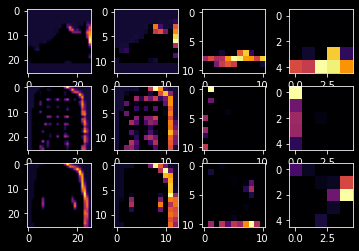

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

fg, axs = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26

CONVOLUTION_NUMBER = 10

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axs[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axs[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axs[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axs[2,x].grid(False)

# Exercises

## Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train, X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=10)

test_loss, test_acc = model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5053 - acc: 0.8181
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3503 - acc: 0.8737
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3052 - acc: 0.8887
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - acc: 0.8959
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - acc: 0.9026
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2431 - acc: 0.9094
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2300 - acc: 0.9139
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2180 - acc: 0.9183
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2051 - acc: 0.9222
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2898 - acc: 0.9018


##Remove the final Convolution. What impact will this have on accuracy or training time?

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train, X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=10)

test_loss, test_acc = model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3930 - acc: 0.8619
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2649 - acc: 0.9054
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2216 - acc: 0.9189
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1880 - acc: 0.9313
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1637 - acc: 0.9396
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1418 - acc: 0.9482
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1159 - acc: 0.9579
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - acc: 0.9630
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - acc: 0.9685
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3170 - acc: 0.9155


## How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train, X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=10)

test_loss, test_acc = model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5883 - acc: 0.7830
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3948 - acc: 0.8551
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3398 - acc: 0.8740
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3021 - acc: 0.8888
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2756 - acc: 0.8982
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2556 - acc: 0.9039
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2366 - acc: 0.9111
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2200 - acc: 0.9196
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2077 - acc: 0.9222
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3016 - acc: 0.8972


## Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.


In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train, X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=10)

test_loss, test_acc = model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3705 - acc: 0.8676
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2392 - acc: 0.9116
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1816 - acc: 0.9323
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1377 - acc: 0.9492
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1016 - acc: 0.9634
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0746 - acc: 0.9725
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0572 - acc: 0.9793
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0421 - acc: 0.9850
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0352 - acc: 0.9877
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5156 - acc: 0.9028


## In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc')>0.99:
      print('\n Accuracy above 99%, stopping training! ')
      self.model.stop_training = True

callbacks = Callback()

mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train, X_test = X_train/255.0 , X_test/255.0

model = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                             ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.fit(X_train,Y_train,epochs=30,callbacks=[callbacks])

test_loss, test_acc = model.evaluate(X_test,Y_test)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4484 - acc: 0.8373
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2984 - acc: 0.8904
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2546 - acc: 0.9062
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2222 - acc: 0.9180
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1951 - acc: 0.9272
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1720 - acc: 0.9359
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1526 - acc: 0.9424
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1340 - acc: 0.9494
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1179 - acc: 0.9556
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1035 - acc: 0.9603
Epoch 11/30
1875/1875 [======